In [1]:
# Importing necessary libraries to conduct our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

In [82]:
#Reading the dataset into object 'df' using pandas:
final_df= pd.read_csv('..\Datasets\AQI_CitywiseData.csv',parse_dates=True, index_col = "Date")
# df['Date'] = pd.to_datetime(df['Date'])

In [26]:
final_df.isna().sum().sum()


28194

In [83]:
# final_df=df.resample(rule='MS').mean()
final_df = final_df.interpolate(method="linear")
# final_df = final_df.interpolate(method="linear")

final_df.isna().sum().sum()


25354

In [84]:
# final_df=df.resample(rule='MS').mean()
final_df.fillna(method="bfill", inplace=True)
# final_df = final_df.interpolate(method="linear")

final_df.isna().sum().sum()


0

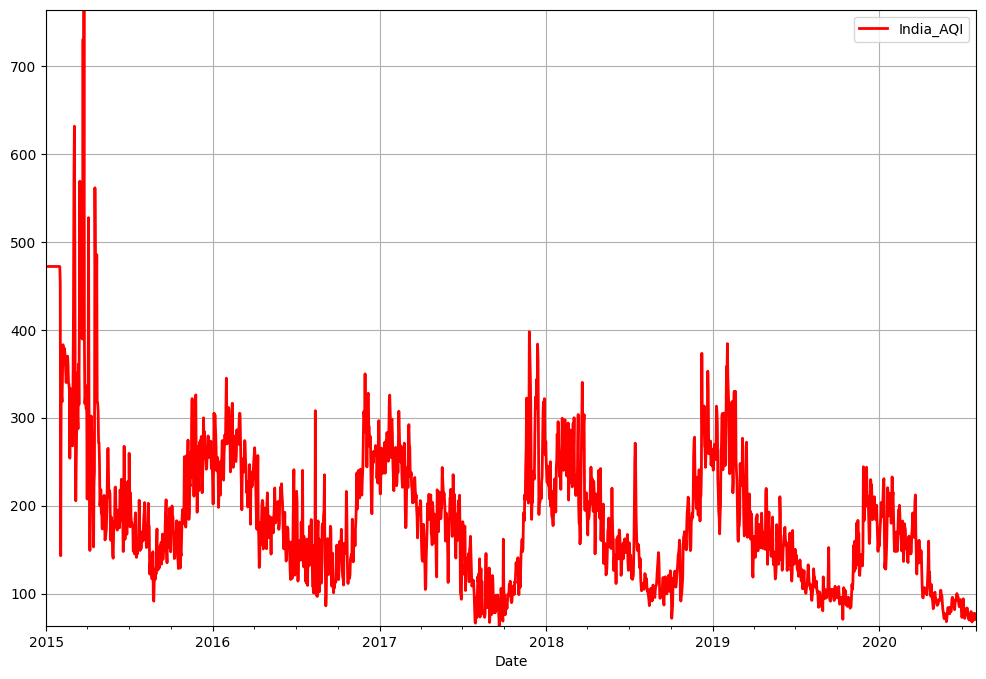

In [30]:
ax=final_df[['India_AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

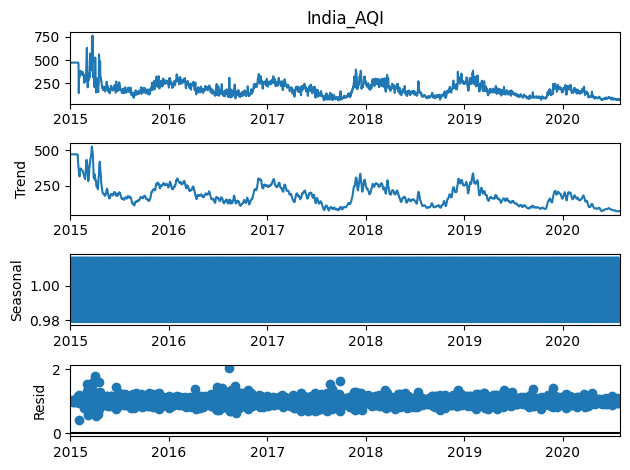

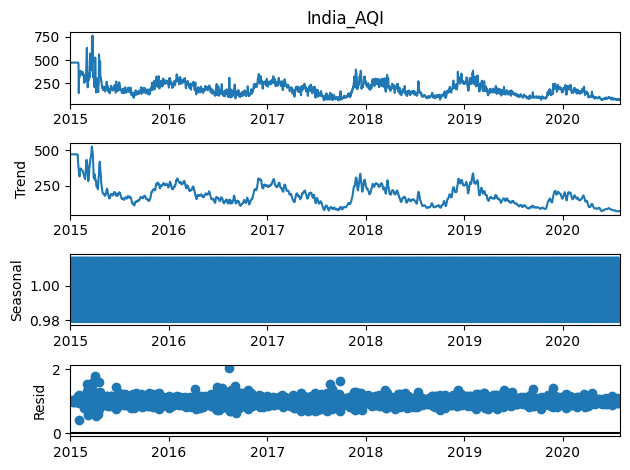

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_AQI=final_df['India_AQI']
result=seasonal_decompose(India_AQI,model='multiplicative')
result.plot()

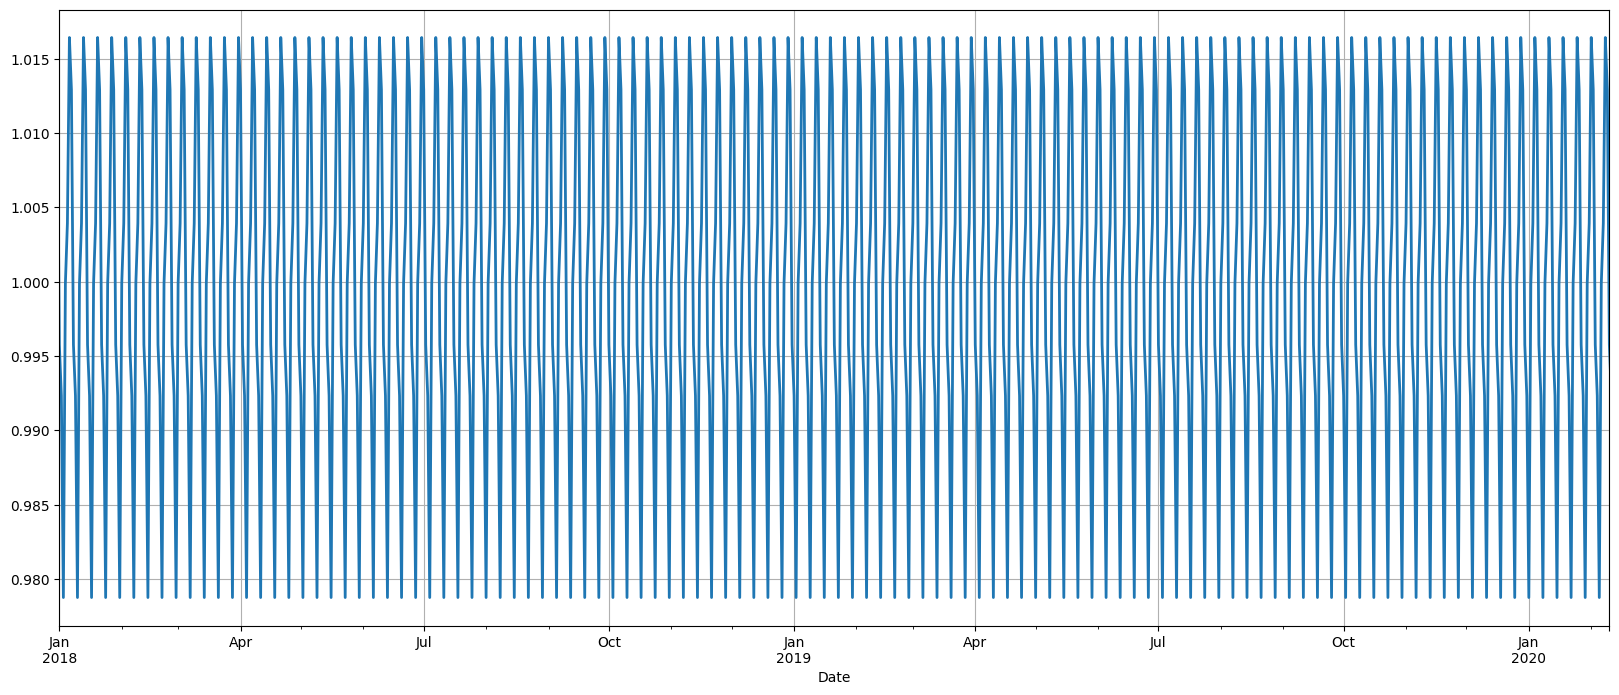

In [36]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [37]:
from prophet import Prophet

In [38]:
#Formatting necessary to Prophet:
India_AQI=India_AQI.reset_index()
India_AQI.columns=['ds','y']

In [39]:
# Forming test/train data:
train=India_AQI[:-24]
test=India_AQI[-24:-12]
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)

22:08:02 - cmdstanpy - INFO - Chain [1] start processing
22:08:02 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
future = m.make_future_dataframe(periods=12,freq = 'MS')

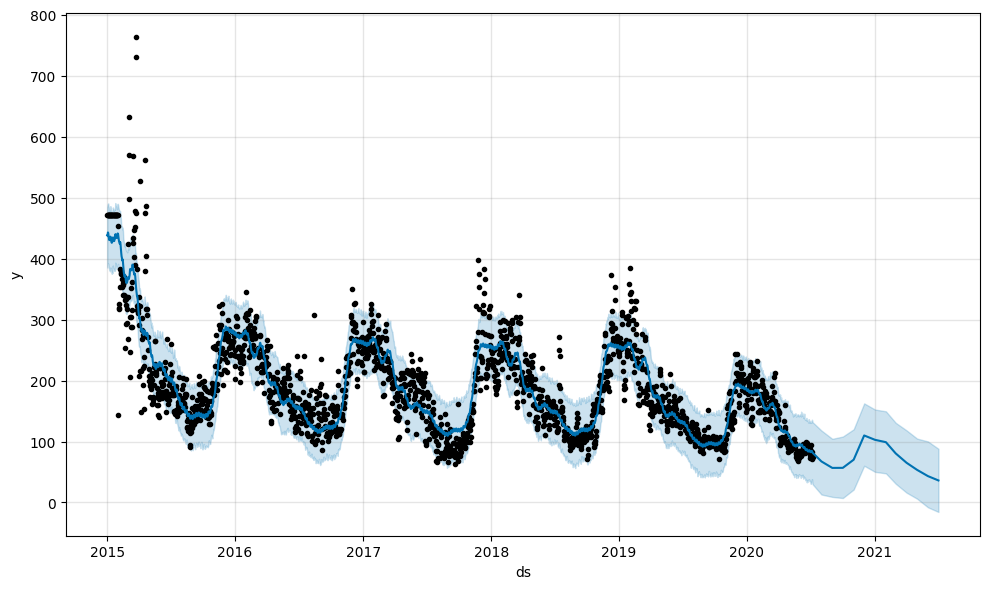

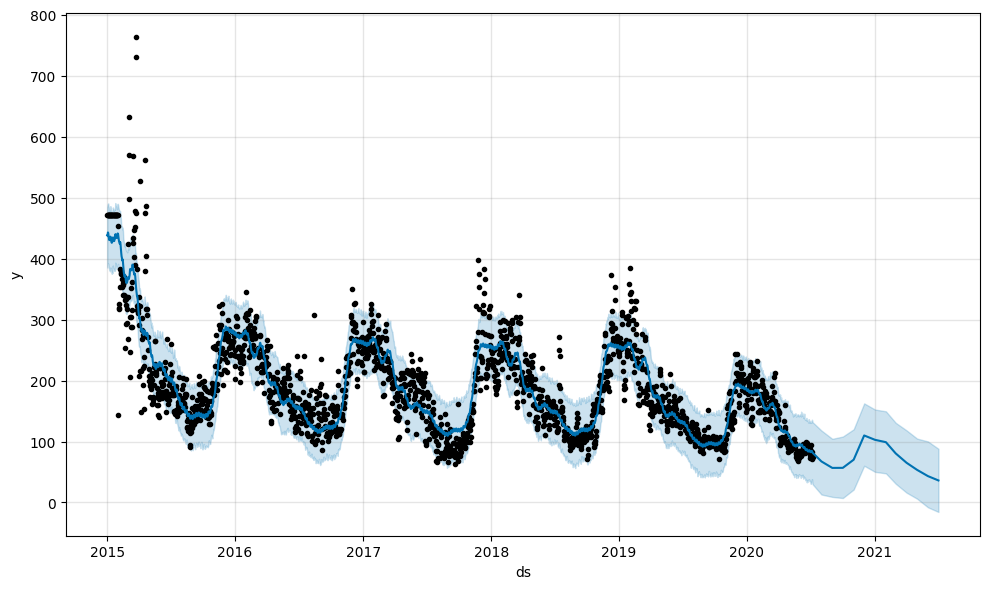

In [41]:
forecast = m.predict(future)
m.plot(forecast)

In [42]:
#Finding RMSE:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(forecast['yhat'][-12:],test['y']))
print('RMSE = ',RMSE)
print('Mean AQI',test['y'].mean())

RMSE =  23.057170324414596
Mean AQI 76.15657004833332


In [70]:
# Reset everything
India_AQI2=final_df['India_AQI'][:'2019-09']
India_AQI2

Date
2015-01-01    472.000000
2015-01-02    472.000000
2015-01-03    472.000000
2015-01-04    472.000000
2015-01-05    472.000000
                 ...    
2019-09-26    108.315789
2019-09-27     97.000000
2019-09-28     95.150000
2019-09-29     99.105263
2019-09-30    102.611111
Name: India_AQI, Length: 1734, dtype: float64

In [71]:

# India_AQI2.tail()
India_AQI2=India_AQI2.reset_index()

India_AQI2.columns=['ds','y']


22:16:37 - cmdstanpy - INFO - Chain [1] start processing
22:16:38 - cmdstanpy - INFO - Chain [1] done processing


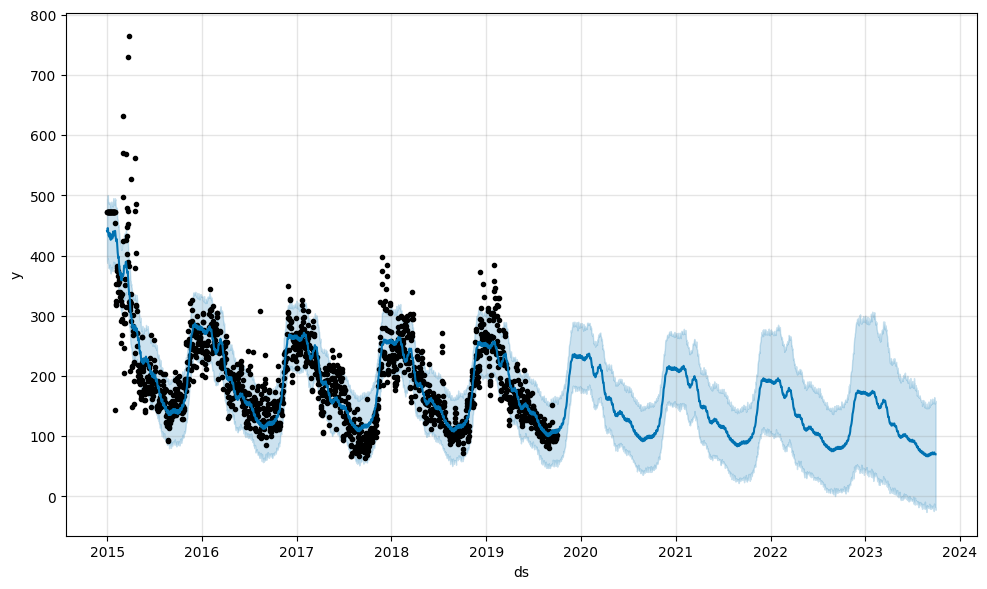

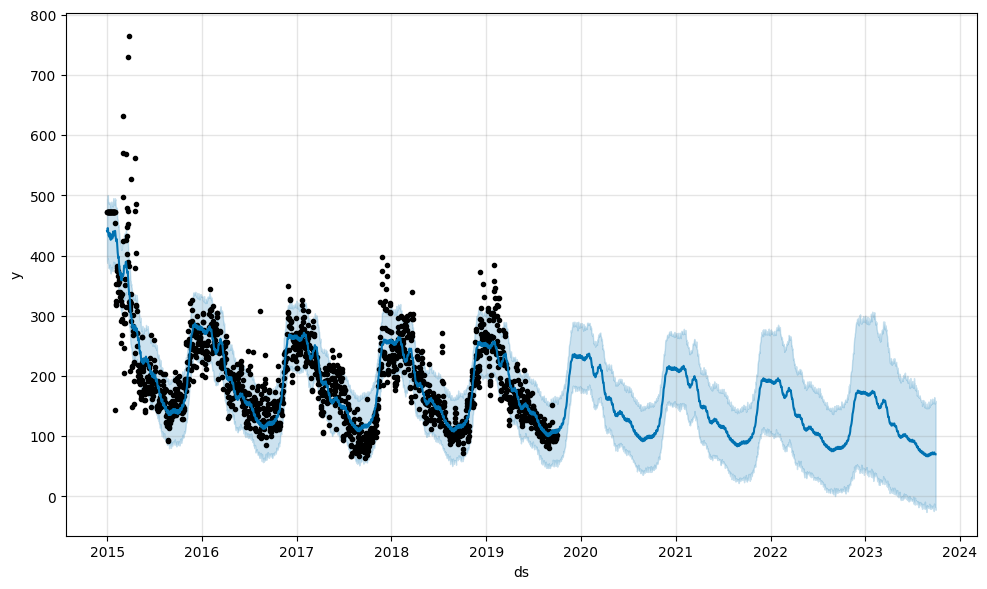

In [74]:
m = Prophet(seasonality_mode='multiplicative',weekly_seasonality=True,daily_seasonality=False)
m.fit(India_AQI2)
future = m.make_future_dataframe(periods=365*4)
forecast = m.predict(future)
m.plot(forecast)

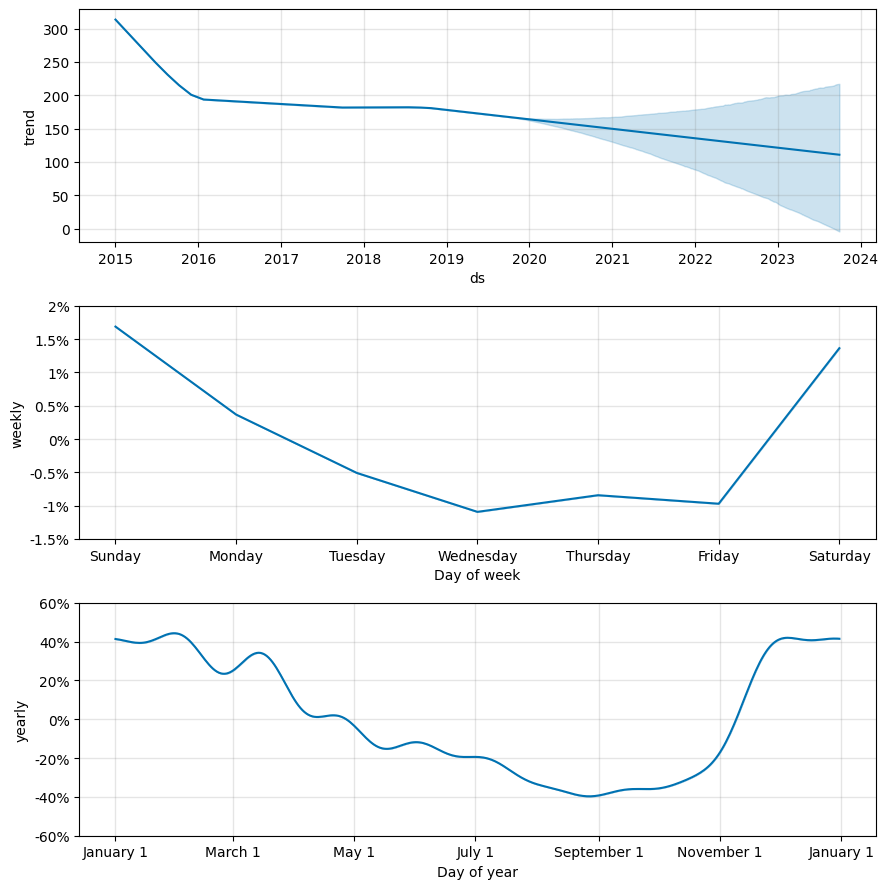

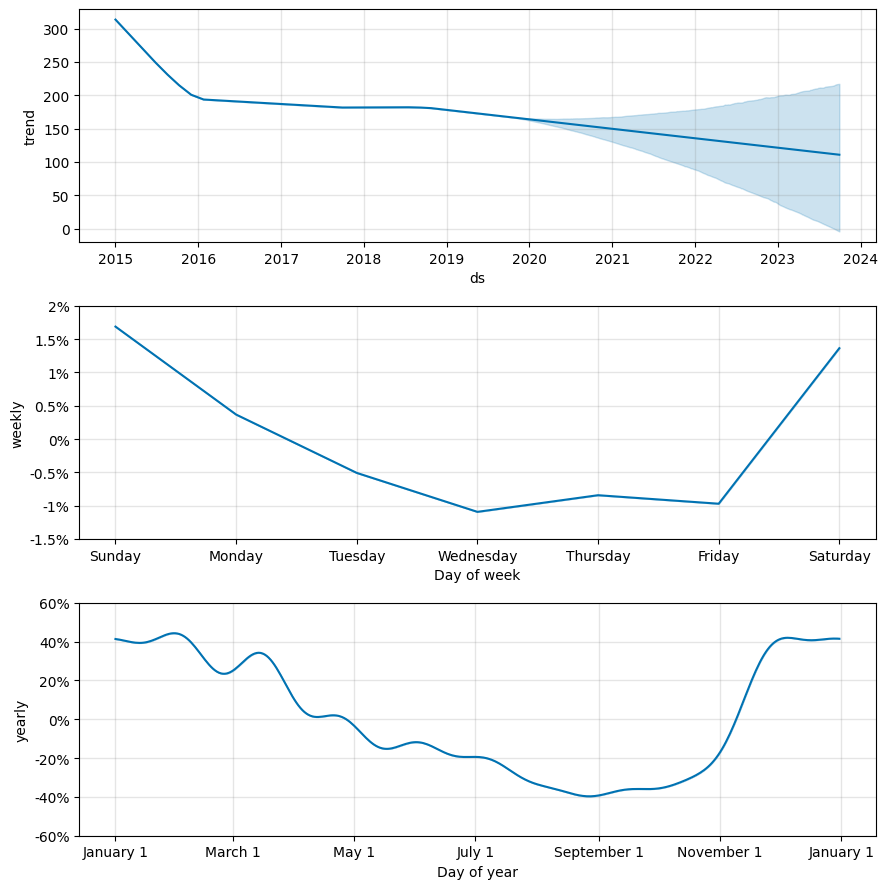

In [75]:
m.plot_components(forecast)

In [76]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2015-01-01,313.605192,390.448508,494.688064,313.605192,313.605192,0.405033,0.405033,0.405033,-0.008441,-0.008441,-0.008441,0.413473,0.413473,0.413473,0.0,0.0,0.0,440.625494
1,2015-01-02,313.239147,387.736047,494.249804,313.239147,313.239147,0.402463,0.402463,0.402463,-0.009719,-0.009719,-0.009719,0.412182,0.412182,0.412182,0.0,0.0,0.0,439.306305
2,2015-01-03,312.873102,393.243452,500.403082,312.873102,312.873102,0.424216,0.424216,0.424216,0.013639,0.013639,0.013639,0.410577,0.410577,0.410577,0.0,0.0,0.0,445.598799
3,2015-01-04,312.507057,395.179337,499.359990,312.507057,312.507057,0.425586,0.425586,0.425586,0.016880,0.016880,0.016880,0.408705,0.408705,0.408705,0.0,0.0,0.0,445.505613
4,2015-01-05,312.141012,390.631348,490.319526,312.141012,312.141012,0.410301,0.410301,0.410301,0.003671,0.003671,0.003671,0.406630,0.406630,0.406630,0.0,0.0,0.0,440.212746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2023-09-25,111.058449,-17.902219,161.981622,-3.497377,217.079691,-0.356124,-0.356124,-0.356124,0.003671,0.003671,0.003671,-0.359795,-0.359795,-0.359795,0.0,0.0,0.0,71.507853
3190,2023-09-26,111.019632,-18.186054,154.555104,-3.673910,217.134565,-0.364919,-0.364919,-0.364919,-0.005090,-0.005090,-0.005090,-0.359828,-0.359828,-0.359828,0.0,0.0,0.0,70.506496
3191,2023-09-27,110.980815,-18.099086,158.195838,-3.850443,217.189439,-0.370666,-0.370666,-0.370666,-0.010940,-0.010940,-0.010940,-0.359725,-0.359725,-0.359725,0.0,0.0,0.0,69.844032
3192,2023-09-28,110.941999,-18.868104,155.409502,-4.026976,217.244313,-0.367884,-0.367884,-0.367884,-0.008441,-0.008441,-0.008441,-0.359443,-0.359443,-0.359443,0.0,0.0,0.0,70.128264


In [81]:
pred = forecast[['ds','yhat']]
pred.to_csv("../AQI_Predictions/test.csv")


In [45]:
final_df=final_df.astype('float64')

# final_df['Delhi'] = final_df['Delhi_AQI'].interpolate(method='polynomial', order=5)
mean_value= final_df['Delhi_AQI'].median()
final_df['Delhi_AQI'] = final_df['Delhi_AQI'].fillna(mean_value)
final_df=final_df.resample(rule='MS').mean()

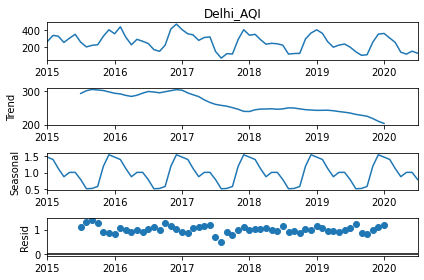

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
Delhi_AQI=final_df['Delhi_AQI']
result=seasonal_decompose(Delhi_AQI,model='multiplicative')
result.plot()

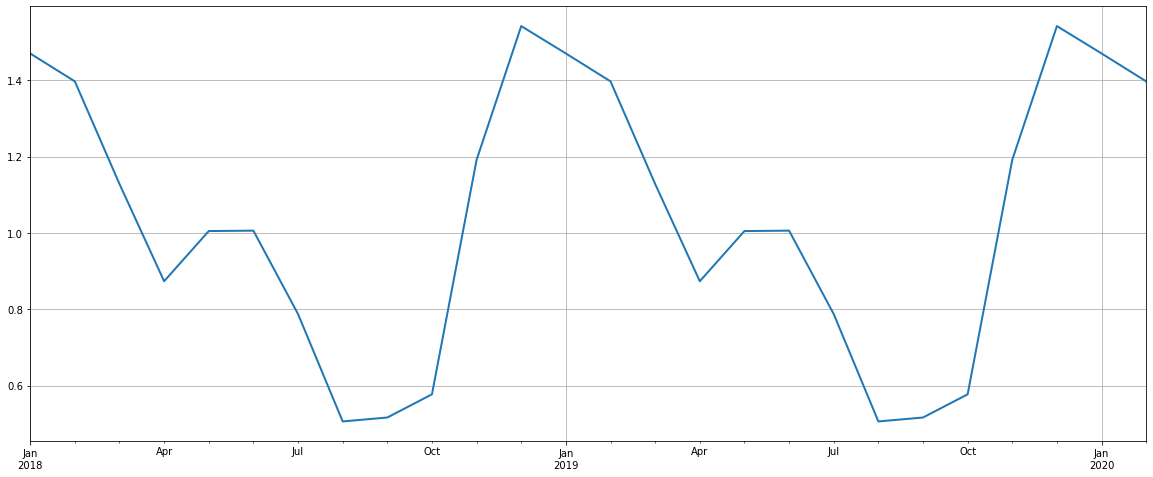

In [47]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [48]:
#Formatting necessary to Prophet:
Delhi_AQI=Delhi_AQI.reset_index()
Delhi_AQI.columns=['ds','y']

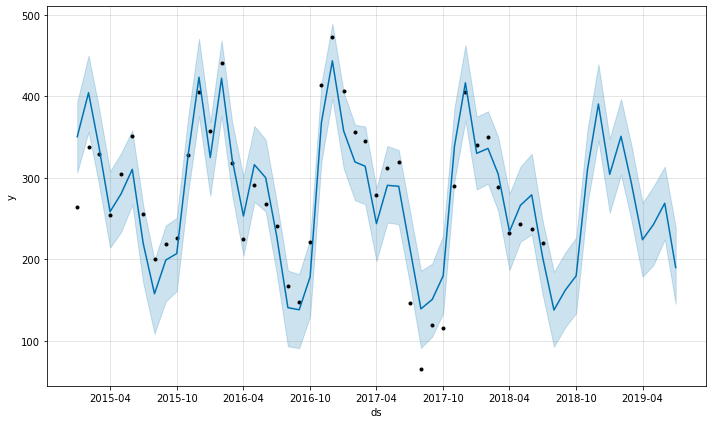

In [53]:
# Forming test/train data:
train= Delhi_AQI[:-24]
test= Delhi_AQI[-24:-12]
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)
future = m.make_future_dataframe(periods=12,freq = 'MS')

forecast = m.predict(future)
m.plot(forecast);

In [54]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2015-01-01,309.528711,306.616334,393.190703,309.528711,309.528711,0.131879,0.131879,0.131879,0.131879,0.131879,0.131879,0.0,0.0,0.0,350.349049
1,2015-02-01,308.679070,356.389477,449.705542,308.679070,308.679070,0.309825,0.309825,0.309825,0.309825,0.309825,0.309825,0.0,0.0,0.0,404.315419
2,2015-03-01,307.911652,293.794709,387.230411,307.911652,307.911652,0.102037,0.102037,0.102037,0.102037,0.102037,0.102037,0.0,0.0,0.0,339.330175
3,2015-04-01,307.062010,214.236957,307.902852,307.062010,307.062010,-0.158811,-0.158811,-0.158811,-0.158811,-0.158811,-0.158811,0.0,0.0,0.0,258.297095
4,2015-05-01,306.239776,233.113819,329.924126,306.239776,306.239776,-0.085602,-0.085602,-0.085602,-0.085602,-0.085602,-0.085602,0.0,0.0,0.0,280.025024
5,2015-06-01,305.390135,267.091033,358.016119,305.390135,305.390135,0.016053,0.016053,0.016053,0.016053,0.016053,0.016053,0.0,0.0,0.0,310.292559
6,2015-07-01,304.567901,170.913856,265.941421,304.567901,304.567901,-0.279753,-0.279753,-0.279753,-0.279753,-0.279753,-0.279753,0.0,0.0,0.0,219.364131
7,2015-08-01,303.718260,108.729144,198.912134,303.718260,303.718260,-0.480875,-0.480875,-0.480875,-0.480875,-0.480875,-0.480875,0.0,0.0,0.0,157.667760
8,2015-09-01,302.868618,148.474300,241.507760,302.868618,302.868618,-0.342903,-0.342903,-0.342903,-0.342903,-0.342903,-0.342903,0.0,0.0,0.0,199.014066
9,2015-10-01,302.046384,160.858787,250.613451,302.046384,302.046384,-0.314844,-0.314844,-0.314844,-0.314844,-0.314844,-0.314844,0.0,0.0,0.0,206.948771


In [50]:
#Finding RMSE:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(forecast['yhat'][-12:],test['y']))
print('RMSE = ',RMSE)
print('Mean AQI',test['y'].mean())

RMSE =  40.741521001219226
Mean AQI 241.6386584741423


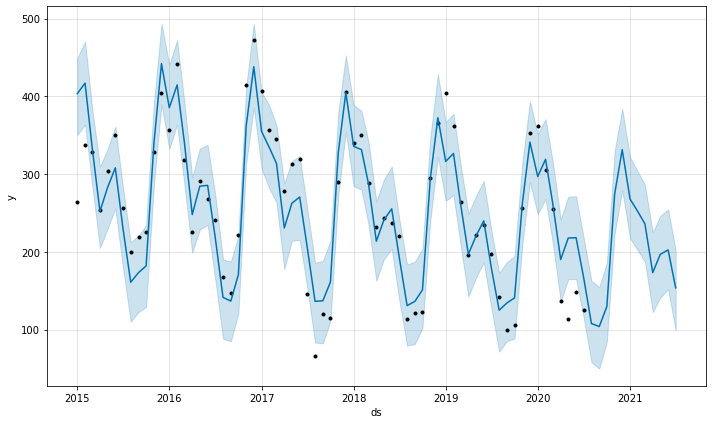

In [51]:
m = Prophet(seasonality_mode='multiplicative',weekly_seasonality=False,daily_seasonality=False)
m.fit(Delhi_AQI)
future = m.make_future_dataframe(periods=12,freq = 'MS')
forecast = m.predict(future)
m.plot(forecast);

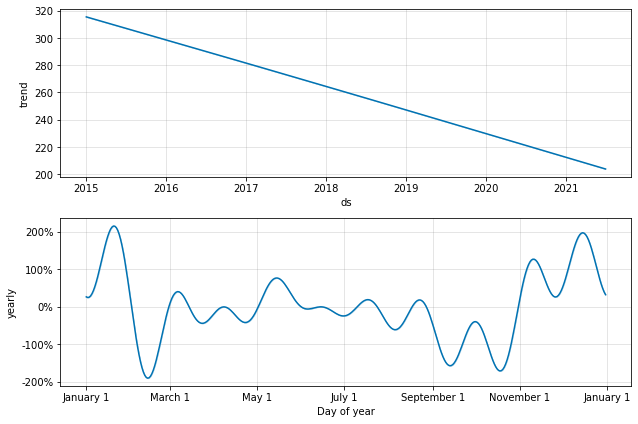

In [52]:
m.plot_components(forecast);